# Exploratory Data Analysis on Uber Data

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv("uber.csv")

## 1.Pre-process the dataset

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [4]:
#to get the required information of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35725 entries, 0 to 35724
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35725 non-null  int64  
 1   key                35725 non-null  object 
 2   fare_amount        35725 non-null  float64
 3   pickup_datetime    35725 non-null  object 
 4   pickup_longitude   35724 non-null  float64
 5   pickup_latitude    35724 non-null  float64
 6   dropoff_longitude  35724 non-null  float64
 7   dropoff_latitude   35724 non-null  float64
 8   passenger_count    35724 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.5+ MB


In [5]:
#To get number of columns in the dataset
df.columns 

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis = 1) #To drop unnamed column as it isn't required

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [8]:
#To get the total (rows, columns)
df.shape 

(35725, 7)

In [9]:
#To get the type of each column
df.dtypes 

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35725 entries, 0 to 35724
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        35725 non-null  float64
 1   pickup_datetime    35725 non-null  object 
 2   pickup_longitude   35724 non-null  float64
 3   pickup_latitude    35724 non-null  float64
 4   dropoff_longitude  35724 non-null  float64
 5   dropoff_latitude   35724 non-null  float64
 6   passenger_count    35724 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.9+ MB


In [11]:
#To get statistics of each column
df.describe() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,35725.000000,35724.000000,35724.000000,35724.000000,35724.000000,35724.000000
mean,11.394681,-72.561212,39.942645,-72.572503,39.943957,1.677024
std,10.085005,10.911110,6.047059,10.852786,6.043435,1.294493
min,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000
25%,6.000000,-73.992033,40.734753,-73.991475,40.733846,1.000000
50%,8.500000,-73.981821,40.752563,-73.980170,40.752855,1.000000
75%,12.900000,-73.967196,40.767152,-73.963545,40.768076,2.000000
max,350.000000,40.774042,45.031653,40.828377,45.031598,6.000000


## 2.Filling missing values

In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [13]:
df['dropoff_longitude'].fillna(value = df['dropoff_longitude'].mean(), inplace = True)

In [14]:
df['dropoff_latitude'].fillna(value = df['dropoff_latitude'].mean(), inplace = True)

In [16]:
df['pickup_longitude'].fillna(value = df['pickup_longitude'].mean(), inplace = True)

In [19]:
df['pickup_latitude'].fillna(value = df['pickup_latitude'].mean(), inplace = True)

In [20]:
df['passenger_count'].fillna(value = df['passenger_count'].mean(), inplace = True)

In [21]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [22]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

## 3.Column pickup_datetime is in wrong format(object). Convert it to DateTime Format

In [23]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [24]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

## 4.To segregate each time of date and time 

In [27]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0


In [28]:
# Drop the column 'pickup_datetime' using drop()
# 'axis=1' drops the specified column
df=df.drop('pickup_datetime', axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0


In [29]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

## 5. Checking outliers and filling them 

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

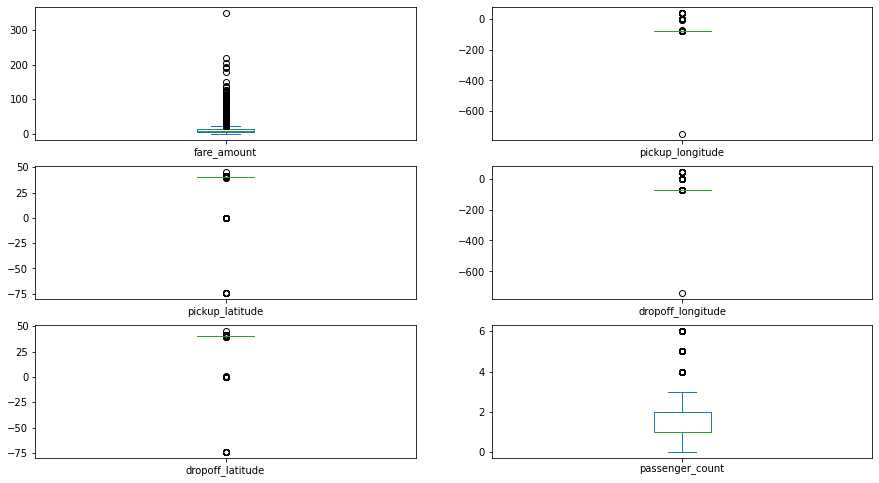

In [30]:
#Boxplot to check the outliers
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))

In [31]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

In [32]:
def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

In [33]:
df = treat_outliers_all(df, df.iloc[:, 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

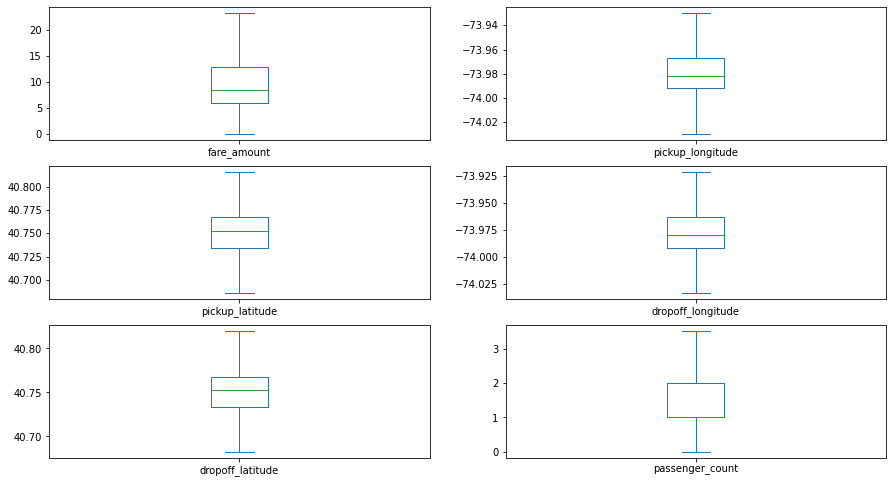

In [34]:
#Boxplot shows that dataset is free from outliers
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))

## Distance Calculation

In [35]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
#Calculate the distance using Haversine to calculate th distance between two points. Can't use Eucladian as it is for flat surface.
import haversine as hs

In [37]:
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1, lati1, long2, lati2 = [df['pickup_longitude'][pos], df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]]
    loc1=(lati1, long1)
    loc2=(lati2, long2)
    c=hs.haversine(loc1, loc2)
    travel_dist.append(c)
##print(travel_dist)

In [38]:
df['dist_travel_km'] = travel_dist
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661686
4,16.0,-73.929933,40.744085,-73.973082,40.761247,3.5,4.105140


In [39]:
df = df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observation in dataset:", df.shape)

Remaining observation in dataset: (35725, 7)


In [40]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90)|(df.pickup_latitude < -90)|
            (df.dropoff_latitude > 90)|(df.dropoff_latitude < -90)|
            (df.pickup_longitude > 180)|(df.pickup_longitude < -180)|
            (df.dropoff_longitude > 90)|(df.dropoff_longitude < -90)]
df.drop(incorrect_coordinates, inplace=True, errors='ignore')
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661686
4,16.0,-73.929933,40.744085,-73.973082,40.761247,3.5,4.105140


In [41]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dist_travel_km       0
dtype: int64

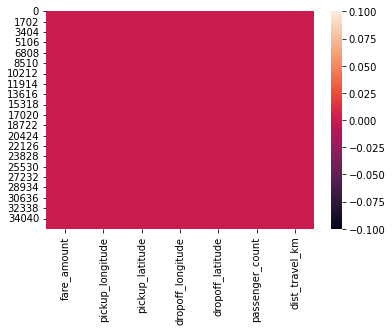

In [42]:
sns.heatmap(df.isnull())

In [43]:
corr=df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
fare_amount,1.000000,0.167068,-0.114358,0.228202,-0.133719,0.018673,0.782000
pickup_longitude,0.167068,1.000000,0.268130,0.428350,0.083042,-0.007945,0.047146
pickup_latitude,-0.114358,0.268130,1.000000,0.053355,0.520840,-0.011389,-0.069105
dropoff_longitude,0.228202,0.428350,0.053355,1.000000,0.249765,-0.005903,0.153389
dropoff_latitude,-0.133719,0.083042,0.520840,0.249765,1.000000,-0.007343,-0.055175
passenger_count,0.018673,-0.007945,-0.011389,-0.005903,-0.007343,1.000000,0.017016
dist_travel_km,0.782000,0.047146,-0.069105,0.153389,-0.055175,0.017016,1.000000


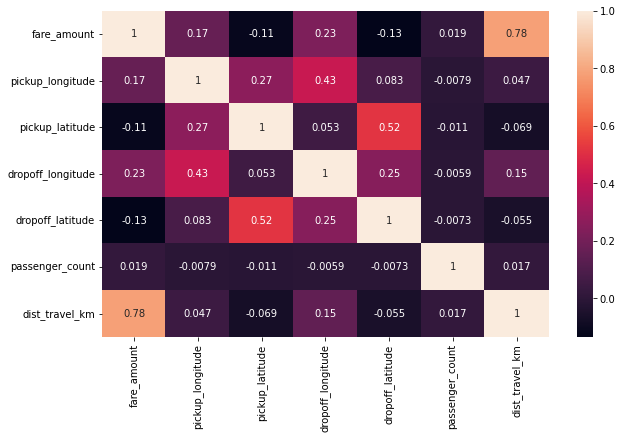

In [44]:
fig,axis = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

## 6. Dividing the dataset into feature and target value

In [46]:
x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist_travel_km']]
y = df['fare_amount']

## 7. Dividing dataset into training and testing dataset

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [49]:
regression.coef_

array([ 30.97638989,  -9.93161966,  22.68315543, -19.70283653,
         0.03256319,   1.90034961])

In [50]:
regression.intercept_

5182.05007385976

In [51]:
prediction = regression.predict(X_test)
print(prediction)

[ 7.37701963 15.932298   11.46910648 ...  8.29696174  9.92700984
  7.05865088]


In [52]:
y_test

34260     6.5
10959    18.0
20324    14.5
4788      8.1
21924     9.0
         ... 
28965    12.1
124      10.1
22995     7.7
10772    14.9
6960      5.5
Name: fare_amount, Length: 7145, dtype: float64

## 9. Matrics evaluation using R2, MSE and RMSE

In [53]:
from sklearn.metrics import r2_score
R2_linear = r2_score(y_test, prediction)
R2_linear

0.6625501536551972

In [54]:
from sklearn.metrics import mean_squared_error
MSE_linear = mean_squared_error(y_test, prediction)
MSE_linear

10.476687073966245

In [55]:
RMSE_linear = np.sqrt(MSE_linear)
RMSE_linear

3.236771087668426

## 10. Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([ 7.066 , 17.5954, 10.183 , ...,  7.23  , 11.222 ,  7.023 ])

## 11. Matrics evaluation of Random Forest

In [57]:
R2_random = r2_score(y_test, y_pred)
R2_random

0.7582370737423282

In [58]:
MSE_random = mean_squared_error(y_test, y_pred)
MSE_random

7.505928812603279

In [59]:
RMSE_random = np.sqrt(MSE_random)
RMSE_random

2.739695021823283

In [60]:
print("Matrics result: linear regression | random forest")
print("R2 score: ",R2_linear,"|", R2_random)
print("MSE: ", MSE_linear,"|", MSE_random)
print("RMSE: ", RMSE_linear,"|", RMSE_random)

Matrics result: linear regression | random forest
R2 score:  0.6625501536551972 | 0.7582370737423282
MSE:  10.476687073966245 | 7.505928812603279
RMSE:  3.236771087668426 | 2.739695021823283
